In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/swatc/Desktop/UNI/Proyecto grupal/Automatch/artifacts/data/modelo_users_cars.csv")

# Limpieza de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16500 entries, 0 to 16499
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_id             16500 non-null  int64 
 1   renta                   16500 non-null  object
 2   condiciones_conduccion  16500 non-null  object
 3   vacaciones              16500 non-null  object
 4   sector                  16500 non-null  object
 5   comunidad_autonoma      16500 non-null  object
 6   familia                 16500 non-null  object
 7   tipo_combustible        16500 non-null  object
 8   uso_habitual            16500 non-null  object
 9   cambio                  16500 non-null  object
 10  plaza_parking           16500 non-null  object
 11  frecuencia_uso          16500 non-null  object
 12  experiencia_conduccion  16500 non-null  object
 13  car_id                  16500 non-null  int64 
 14  Maker                   16500 non-null  object
 15  Ve

## Eliminar columnas duplicadas

In [4]:
# Eliminamos uso_habitual porque esta columna está duplicada (frecuencia_uso), 
# y presupuesto, ya que finalmente no lo hemos incluido en las preguntas al usuario
df = df.drop(columns=['uso_habitual', 'presupuesto'])

## Dtype

Convertir los campos "si/no" en booleanos

In [5]:
#Columnas para pasar a boolean:
columns_to_convert = ['plaza_parking']

# Convertir una columna con valores 'sí'/'no' a booleanos (True/False)
df[columns_to_convert] = df[columns_to_convert].replace({'sí': True, 'no': False})

# Asegurar de que la columna sea de tipo booleano
df[columns_to_convert] = df[columns_to_convert].astype(bool)

Encontrar el motivo por el que KM esta como object

In [6]:
# encontrar el motivo por el que está como tipo object
print(df['Kms'].value_counts())

Kms
119.459km    54
75.427km     49
94.381km     48
101.271km    47
83.563km     47
             ..
63.065km      4
22.827km      4
18.902km      3
101.541km     3
20.515km      2
Name: count, Length: 1171, dtype: int64


In [7]:
# Quitamos el "km" para que el campo sea numérico
df['Kms'] = df['Kms'].str.replace('km', '', regex=False)

# Convertir la columna a tipo numérico
df['Kms'] = pd.to_numeric(df['Kms'], errors='coerce')


Lo mismo para potencia

In [8]:
print(df['Potencia'].value_counts())

Potencia
130CV    2197
100CV    2133
150CV    1763
110CV    1171
115CV     581
         ... 
132CV       8
300CV       8
126CV       7
235CV       7
87CV        6
Name: count, Length: 102, dtype: int64


In [9]:
# Quitamos el "CV" para que el campo sea numérico
df['Potencia'] = df['Potencia'].str.replace('CV', '', regex=False)

# Convertir la columna a tipo numérico
df['Potencia'] = pd.to_numeric(df['Potencia'], errors='coerce')

### Duplicados

In [10]:
# Eliminar duplicados
df = df.drop_duplicates().reset_index(drop=True)

### Nulos

In [11]:
#mostrar las filas con valores nulos:
df[df.isnull().any(axis=1)]

,customer_id,renta,condiciones_conduccion,vacaciones,sector,comunidad_autonoma,familia,tipo_combustible,cambio,plaza_parking,...,Price,Year,Kms,Potencia,Caja_velocidades,tipo_combustible.1,Puertas,Plazas,Marca,target


### Outliers

C:\Users\swatc\AppData\Local\Temp\ipykernel_1344\1294068080.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


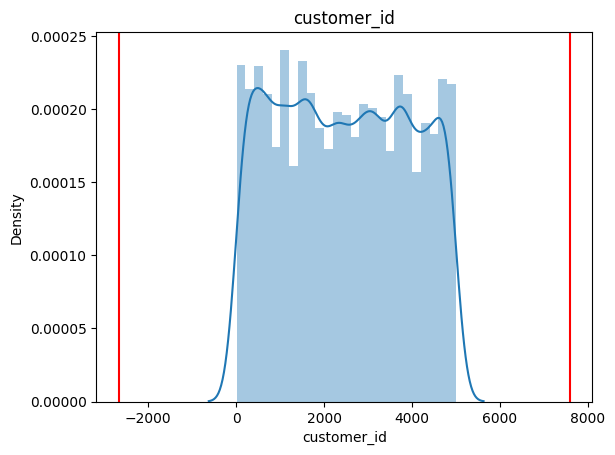

C:\Users\swatc\AppData\Local\Temp\ipykernel_1344\1294068080.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


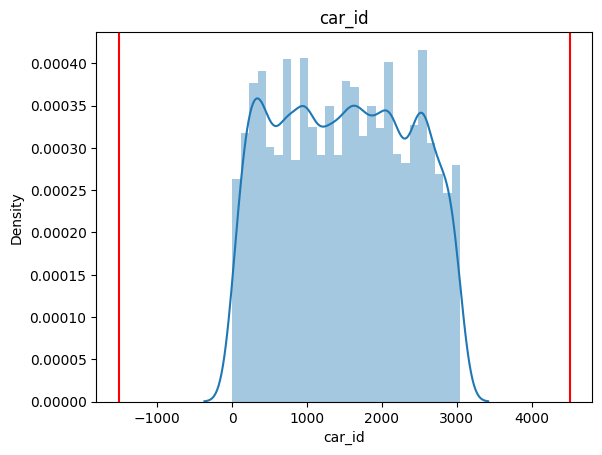

C:\Users\swatc\AppData\Local\Temp\ipykernel_1344\1294068080.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


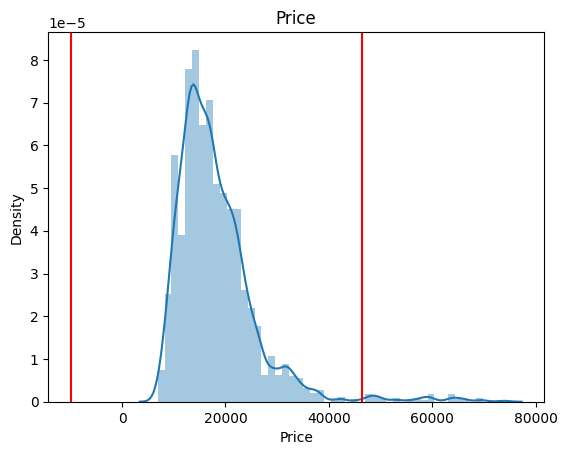

C:\Users\swatc\AppData\Local\Temp\ipykernel_1344\1294068080.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


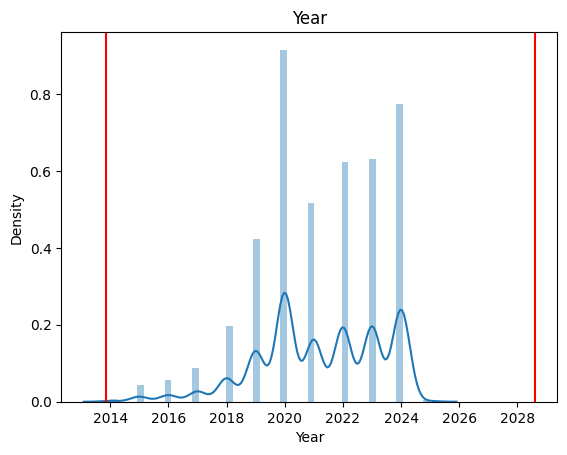

C:\Users\swatc\AppData\Local\Temp\ipykernel_1344\1294068080.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


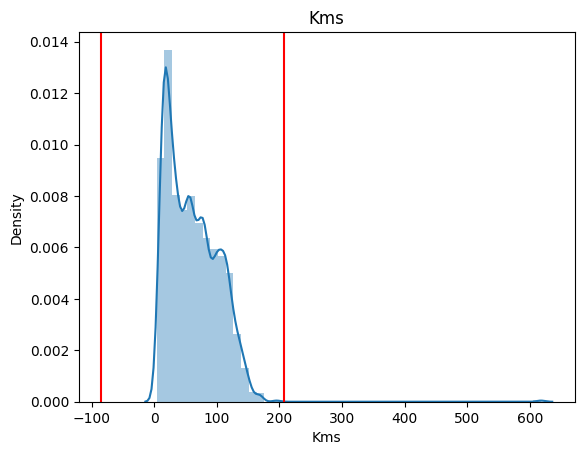

C:\Users\swatc\AppData\Local\Temp\ipykernel_1344\1294068080.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


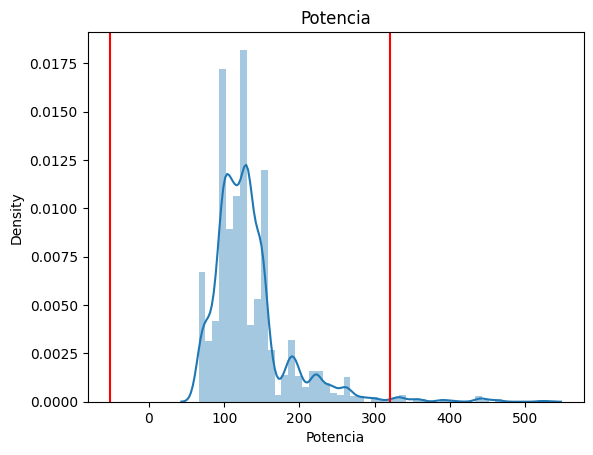

C:\Users\swatc\AppData\Local\Temp\ipykernel_1344\1294068080.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


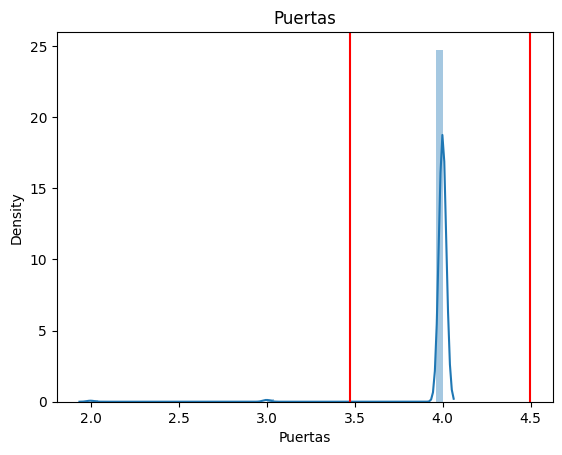

C:\Users\swatc\AppData\Local\Temp\ipykernel_1344\1294068080.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


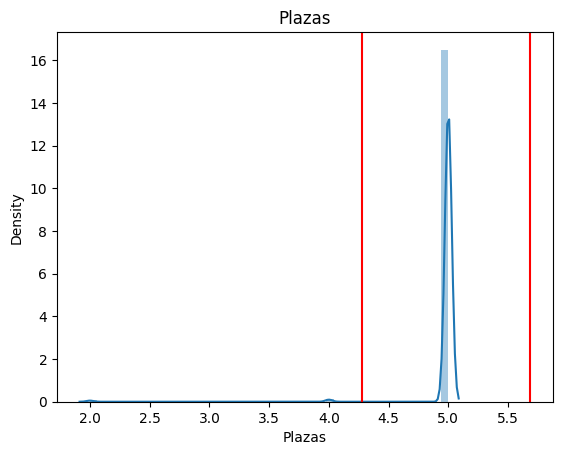

C:\Users\swatc\AppData\Local\Temp\ipykernel_1344\1294068080.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


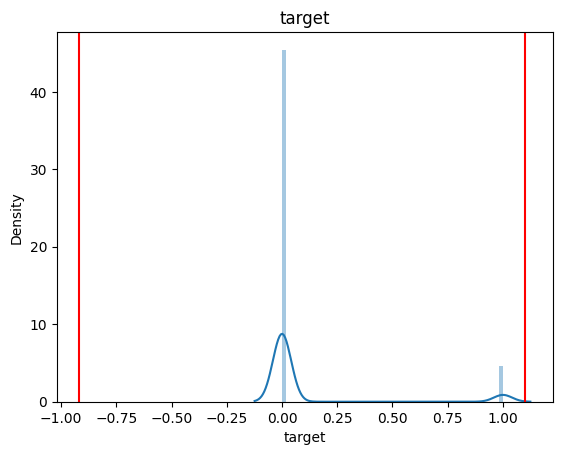

In [12]:
# Visualizar outliers para valorar su tratamiento:
for col in df.select_dtypes(include=["int",'float']).columns:
    media = df[col].mean()
    desviacion_estandar = df[col].std()
    
    umbral_superior = media + 3.5 * desviacion_estandar
    umbral_inferior = media - 3.5 * desviacion_estandar
    sns.distplot(df[col])
    plt.axvline(umbral_inferior,color='red')
    plt.axvline(umbral_superior,color='red')
    plt.title(col)
    plt.show()
    plt.close()

en este caso solamente habría que tratar outliers en los campos precio y km. En este caso, como vamos a probar con RandomForestClassifier y un XGBoost, no vamos a gestionar los outliers de momento, ya que ambos modelos son bastante robustos frente a valores atípicos. 

## Escalado

Por el momento no es necesario escalar, ya que voy a probar con un RandomForestClassifier y un XGBoost, los cuales no necesitan que los valores estén escalados

# Encoding

## Label encoding

In [13]:

from sklearn.preprocessing import LabelEncoder


Renta:

In [14]:
# Diccionario con los rangos y sus valores: para mantener un orden
renta_mapping = {
    '-12000': 0,
    '12000 - 20000': 1,
    '20000 - 35000': 2,
    '35000-60000': 3,
    '60000 - 100000': 4,
    '100000': 5
}


df['renta_encoded'] = df['renta'].map(renta_mapping)

Familia:

In [15]:
familia_mapping = {
    'No': 0,
    'Si, pequeña': 1,
    'Si, grande': 2,
}


df['familia_encoded'] = df['familia'].map(familia_mapping)

Frecuencia uso:

In [16]:
frecuencia_uso_mapping = {
    'ocasional': 0,
    'semanal': 1,
    'diario': 2,
}


df['frecuencia_uso_encoded'] = df['frecuencia_uso'].map(frecuencia_uso_mapping)

Experiencia conduccion

In [17]:
experiencia_conduccion_mapping = {
    'novato': 0,
    'intermedio': 1,
    'experto': 2,
}


df['experiencia_conduccion_encoded'] = df['experiencia_conduccion'].map(experiencia_conduccion_mapping)

## Frequency encoding

Vamos a utilizar un Frequency Encoding (reemplaza categorías con su frecuencia en el dataset), ya que las categorías no tienen un orden natural (label encoding) y quiero evitar añadir más columnas al dataframe (One hot encoding y Binary encoding)

In [18]:
# vacaciones
df['vacaciones_freq'] = df['vacaciones'].map(df['vacaciones'].value_counts(normalize=True))
print(df[['vacaciones', 'vacaciones_freq']])

      vacaciones  vacaciones_freq
0         ciudad         0.296274
1          playa         0.197151
2        montaña         0.506576
3          playa         0.197151
4        montaña         0.506576
...          ...              ...
16419     ciudad         0.296274
16420     ciudad         0.296274
16421     ciudad         0.296274
16422     ciudad         0.296274
16423     ciudad         0.296274

[16424 rows x 2 columns]


In [19]:
# sector
df['sector_freq'] = df['sector'].map(df['sector'].value_counts(normalize=True))
print(df[['sector', 'sector_freq']])

                         sector  sector_freq
0                    Tecnología     0.188139
1                         Salud     0.151120
2        Transporte y Logística     0.046883
3                      Comercio     0.110022
4                      Comercio     0.110022
...                         ...          ...
16419  Entretenimiento y Medios     0.052789
16420  Entretenimiento y Medios     0.052789
16421  Entretenimiento y Medios     0.052789
16422  Entretenimiento y Medios     0.052789
16423  Entretenimiento y Medios     0.052789

[16424 rows x 2 columns]


In [20]:
# comunidad_autonoma
df['comunidad_autonoma_freq'] = df['comunidad_autonoma'].map(df['comunidad_autonoma'].value_counts(normalize=True))
print(df[['comunidad_autonoma', 'comunidad_autonoma_freq']])

      comunidad_autonoma  comunidad_autonoma_freq
0                 Aragón                 0.167621
1                Galicia                 0.029347
2            Extremadura                 0.049075
3               Cataluña                 0.030017
4               Baleares                 0.128714
...                  ...                      ...
16419          Andalucía                 0.177484
16420          Andalucía                 0.177484
16421          Andalucía                 0.177484
16422          Andalucía                 0.177484
16423          Andalucía                 0.177484

[16424 rows x 2 columns]


In [21]:
# condiciones_conduccion
df['condiciones_conduccion_freq'] = df['condiciones_conduccion'].map(df['condiciones_conduccion'].value_counts(normalize=True))
print(df[['condiciones_conduccion', 'condiciones_conduccion_freq']])

      condiciones_conduccion  condiciones_conduccion_freq
0                      nieve                     0.209206
1                 buen clima                     0.698307
2                      nieve                     0.209206
3                      nieve                     0.209206
4                      nieve                     0.209206
...                      ...                          ...
16419               off-road                     0.092487
16420               off-road                     0.092487
16421               off-road                     0.092487
16422               off-road                     0.092487
16423               off-road                     0.092487

[16424 rows x 2 columns]


In [22]:
# Caja_velocidades
df['Caja_velocidades_freq'] = df['Caja_velocidades'].map(df['Caja_velocidades'].value_counts(normalize=True))
print(df[['Caja_velocidades', 'Caja_velocidades_freq']])

      Caja_velocidades  Caja_velocidades_freq
0           Automatico               0.409766
1               Manual               0.590234
2           Automatico               0.409766
3           Automatico               0.409766
4           Automatico               0.409766
...                ...                    ...
16419       Automatico               0.409766
16420           Manual               0.590234
16421       Automatico               0.409766
16422       Automatico               0.409766
16423           Manual               0.590234

[16424 rows x 2 columns]


In [23]:
# tipo_combustible.1
df['tipo_combustible.1_freq'] = df['tipo_combustible.1'].map(df['tipo_combustible.1'].value_counts(normalize=True))
print(df[['tipo_combustible.1', 'tipo_combustible.1_freq']])

      tipo_combustible.1  tipo_combustible.1_freq
0               Gasolina                 0.397041
1                 Diesel                 0.301449
2                 Diesel                 0.301449
3                Hibrido                 0.282513
4                Hibrido                 0.282513
...                  ...                      ...
16419            Hibrido                 0.282513
16420             Diesel                 0.301449
16421            Hibrido                 0.282513
16422           Gasolina                 0.397041
16423           Gasolina                 0.397041

[16424 rows x 2 columns]


In [24]:
# Marca (cambiamos un poco el código porque hay dos marcas con el mismo nº de vihículos)
df['Marca_freq'] = df['Marca'].map(df['Marca'].value_counts(normalize=True).sort_values(ascending=False))
print(df[['Marca', 'Marca_freq']])

            Marca  Marca_freq
0          Abarth    0.000487
1            Alfa    0.003897
2            Alfa    0.003897
3            Alfa    0.003897
4            Alfa    0.003897
...           ...         ...
16419     Hyundai    0.032696
16420        Jeep    0.030382
16421    Mercedes    0.029104
16422  Volkswagen    0.060399
16423     Peugeot    0.162080

[16424 rows x 2 columns]


# Colinealidad

<Axes: >

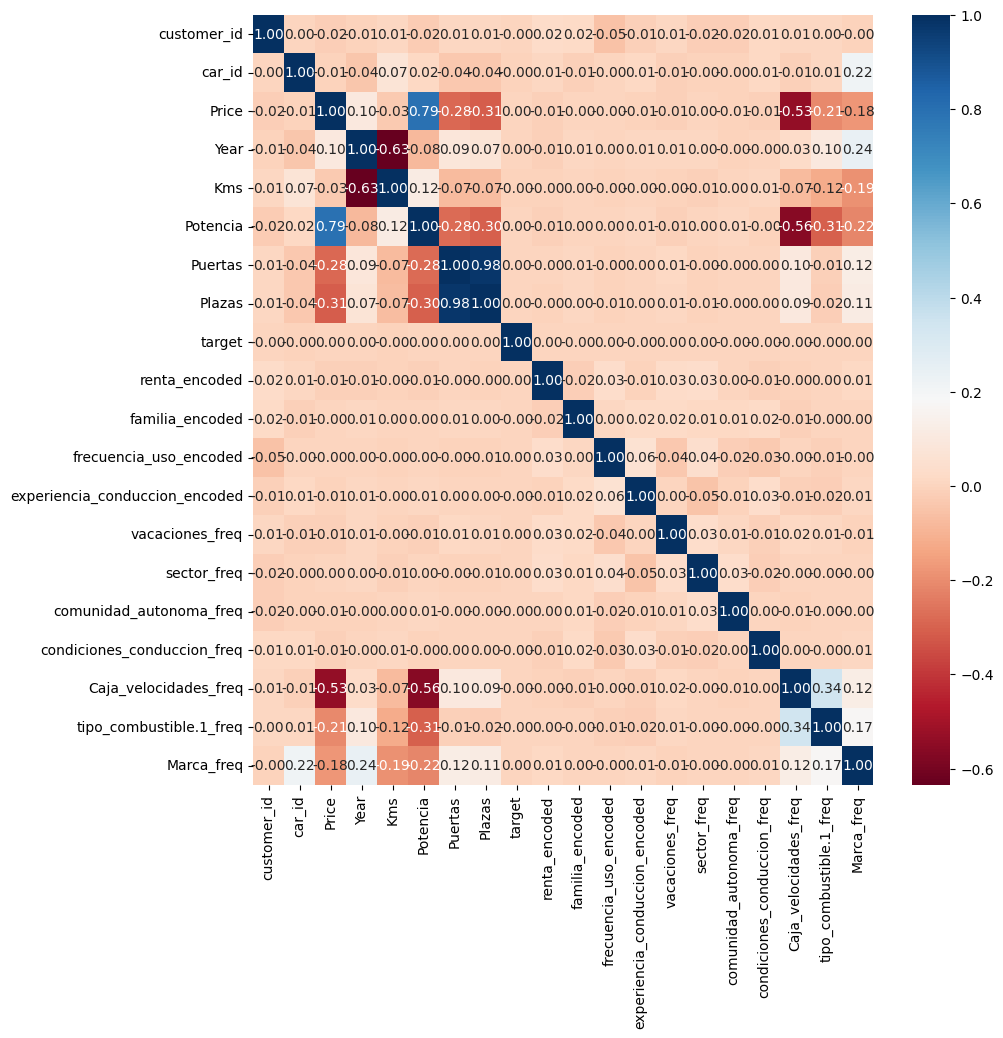

In [25]:
df_corr = df.select_dtypes(include=['number'])

# Crear la figura del heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='RdBu')

# MODELOS

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

Quitar columnas innecesarias:

In [27]:
df = df.drop(columns=[
    'customer_id', 'renta', 'condiciones_conduccion','vacaciones', 'sector', 'comunidad_autonoma', 'familia',
    'tipo_combustible', 'cambio','frecuencia_uso','experiencia_conduccion', 'car_id', 'Maker', 'Version',
    'Caja_velocidades','tipo_combustible.1', 'Marca'])

X, y

In [28]:
X = df.drop(columns=['target'])
y = df['target']

Train y test

In [29]:
# colocamos random state para que los resultados sean replicables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

## RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc_model = RandomForestClassifier(random_state=42)

In [32]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Hacemos predicciones con el modelo entrenado en el conjunto de prueba
y_pred = rfc_model.predict_proba(X_test)

# Convertimos las probabilidades en clases (0 o 1)
y_pred_class = (y_pred[:, 1] > 0.6).astype(int)

# Desempeño en entrenamiento
y_train_pred_proba = rfc_model.predict_proba(X_train)
    # Convertimos en clases para poder comparar con el target (0/1). Consideramos 1 si >0.6
y_train_pred_class = (y_train_pred_proba[:, 1] > 0.6).astype(int)  


rfc_train_mae = mean_absolute_error(y_train, y_train_pred_class)
rfc_train_mse = mean_squared_error(y_train, y_train_pred_class)
rfc_train_rmse = mean_squared_error(y_train, y_train_pred_class)**0.5

# Desempeño en prueba
rfc_test_mae = mean_absolute_error(y_test, y_pred_class)
rfc_test_mse = mean_squared_error(y_test, y_pred_class)
rfc_test_rmse = mean_squared_error(y_test, y_pred_class)**0.5

## XGBoost

In [34]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
xgb_model = xgb.XGBClassifier(random_state=42)

In [36]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [37]:
y_pred_xgb = xgb_model.predict_proba(X_test)

In [38]:
# Convertimos las probabilidades en clases (0 o 1)
y_pred_class = (y_pred_xgb[:, 1] > 0.6).astype(int)

# Desempeño en entrenamiento
y_train_pred_proba = xgb_model.predict_proba(X_train)
    # Convertimos en clases para poder comparar con el target (0/1). Consideramos 1 si >0.6
y_train_pred_class = (y_train_pred_proba[:, 1] > 0.6).astype(int)  


xgb_train_mae = mean_absolute_error(y_train, y_train_pred_class)
xgb_train_mse = mean_squared_error(y_train, y_train_pred_class)
xgb_train_rmse = mean_squared_error(y_train, y_train_pred_class)**0.5

# Desempeño en prueba
xgb_test_mae = mean_absolute_error(y_test, y_pred_class)
xgb_test_mse = mean_squared_error(y_test, y_pred_class)
xgb_test_rmse = mean_squared_error(y_test, y_pred_class)**0.5

## Comparación modelos 

In [39]:
print ('RandomForest:')
print(f'Errores en train: MAE=', rfc_train_mae, '/ MSE=',rfc_train_mse, '/ RMSE=', rfc_train_rmse)
print(f'Errores en test: MAE=', rfc_test_mae, '/ MSE=',rfc_test_mse, '/ RMSE=', rfc_test_rmse)
print ('-'*40)
print ('XGBoost:')
print(f'Errores en train: MAE=', xgb_train_mae, '/ MSE=',xgb_train_mse, '/ RMSE=', xgb_train_rmse)
print(f'Errores en test: MAE=', xgb_test_mae, '/ MSE=',xgb_test_mse, '/ RMSE=', xgb_test_rmse)

RandomForest:
Errores en train: MAE= 0.01139526791927627 / MSE= 0.01139526791927627 / RMSE= 0.10674862022188517
Errores en test: MAE= 0.09009740259740259 / MSE= 0.09009740259740259 / RMSE= 0.3001622937635615
----------------------------------------
XGBoost:
Errores en train: MAE= 0.07593945720250522 / MSE= 0.07593945720250522 / RMSE= 0.2755711472605672
Errores en test: MAE= 0.09212662337662338 / MSE= 0.09212662337662338 / RMSE= 0.3035236784447358


Análisis y comparación:
* **Desempeño en entrenamiento:**\
RandomForest tiene un error muy bajo en entrenamiento (casi 0), lo que sugiere qoverfitting, especialmente porque el error en el test es considerablemente mayor. Sin embargo, los valores de MAE, MSE y RMSE muy bajos indican que el modelo ha aprendido bien los patrones en los datos de entrenamiento.
XGBoost también tiene un error relativamente bajo en entrenamiento, pero es algo más alto que el de RandomForest. 
* **Desempeño en prueba:**\
Ambos modelos tienen errores más altos en el conjunto de prueba. 
RandomForest tiene un desempeño ligeramente mejor en el conjunto de prueba, con un MAE, MSE y RMSE más bajos que XGBoost. Esto sugiere que, en este caso, RandomForest ha generalizado mejor en el conjunto de prueba.
* **Conclusión:**\
RandomForest tiene una mejor capacidad de predicción en el conjunto de prueba que XGBoost (según las métricas MAE, MSE, RMSE), pero con una posible tendencia a sobreajustarse a los datos de entrenamiento.
XGBoost es más robusto en cuanto al sobreajuste, pero en este caso, parece que no ha generalizado tan bien en el conjunto de prueba como RandomForest.
XGBoost parece que podría generalizar mejor y evitar más el sobreajuste, pero el desempeño del RandomForest es mejor en este caso.

## Mejora RandomForestClassifier

<Axes: xlabel='Importancia', ylabel='Variable'>

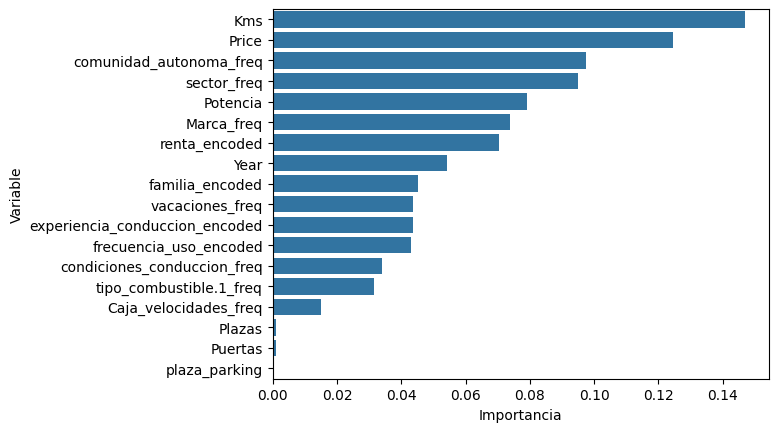

In [40]:
#importancias Random Forest:
importances = rfc_model.feature_importances_

# Crea un DataFrame con las variables y su importancia
importance_rf_df = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importances})
importance_rf_df = importance_rf_df.sort_values('Importancia', ascending=False)
sns.barplot(data = importance_rf_df, x='Importancia', y ='Variable')

In [41]:
# X - y (quitamos 'plaza_parking')
X = df.drop(columns=['plaza_parking', 'target'])
y = df['target']

# Train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state = 42)

In [42]:
rfc_model = RandomForestClassifier(random_state=42)

# Entrenamos el modelo con los hiperparámetros por defecto
rfc_model.fit(X_train, y_train)
# Hacemos predicciones con el modelo entrenado en el conjunto de prueba
y_pred = rfc_model.predict_proba(X_test)

# Convertimos las probabilidades en clases (0 o 1)
y_pred_class = (y_pred[:, 1] > 0.6).astype(int)

# Desempeño en entrenamiento
y_train_pred_proba = rfc_model.predict_proba(X_train)
    # Convertimos en clases para poder comparar con el target (0/1). Consideramos 1 si >0.6
y_train_pred_class = (y_train_pred_proba[:, 1] > 0.6).astype(int)  


rfc_train_mae = mean_absolute_error(y_train, y_train_pred_class)
rfc_train_mse = mean_squared_error(y_train, y_train_pred_class)
rfc_train_rmse = mean_squared_error(y_train, y_train_pred_class)**0.5

# Desempeño en prueba
rfc_test_mae = mean_absolute_error(y_test, y_pred_class)
rfc_test_mse = mean_squared_error(y_test, y_pred_class)
rfc_test_rmse = mean_squared_error(y_test, y_pred_class)**0.5

print(f'Errores en train: MAE=', rfc_train_mae, '/ MSE=',rfc_train_mse, '/ RMSE=', rfc_train_rmse)
print(f'Errores en test: MAE=', rfc_test_mae, '/ MSE=',rfc_test_mse, '/ RMSE=', rfc_test_rmse)

Errores en train: MAE= 0.012177795818956769 / MSE= 0.012177795818956769 / RMSE= 0.11035305079134318
Errores en test: MAE= 0.08888888888888889 / MSE= 0.08888888888888889 / RMSE= 0.29814239699997197


In [43]:
# X - y (quitamos 'Puertas')
X = df.drop(columns=['Puertas', 'target'])
y = df['target']

# Train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state = 42)

In [44]:
rfc_model = RandomForestClassifier(random_state=42)

# Entrenamos el modelo con los hiperparámetros por defecto
rfc_model.fit(X_train, y_train)
# Hacemos predicciones con el modelo entrenado en el conjunto de prueba
y_pred = rfc_model.predict_proba(X_test)

# Convertimos las probabilidades en clases (0 o 1)
y_pred_class = (y_pred[:, 1] > 0.6).astype(int)

# Desempeño en entrenamiento
y_train_pred_proba = rfc_model.predict_proba(X_train)
    # Convertimos en clases para poder comparar con el target (0/1). Consideramos 1 si >0.6
y_train_pred_class = (y_train_pred_proba[:, 1] > 0.6).astype(int)  


rfc_train_mae = mean_absolute_error(y_train, y_train_pred_class)
rfc_train_mse = mean_squared_error(y_train, y_train_pred_class)
rfc_train_rmse = mean_squared_error(y_train, y_train_pred_class)**0.5

# Desempeño en prueba
rfc_test_mae = mean_absolute_error(y_test, y_pred_class)
rfc_test_mse = mean_squared_error(y_test, y_pred_class)
rfc_test_rmse = mean_squared_error(y_test, y_pred_class)**0.5

print(f'Errores en train: MAE=', rfc_train_mae, '/ MSE=',rfc_train_mse, '/ RMSE=', rfc_train_rmse)
print(f'Errores en test: MAE=', rfc_test_mae, '/ MSE=',rfc_test_mse, '/ RMSE=', rfc_test_rmse)

Errores en train: MAE= 0.01167038765983357 / MSE= 0.01167038765983357 / RMSE= 0.1080295684515752
Errores en test: MAE= 0.08873668188736682 / MSE= 0.08873668188736682 / RMSE= 0.297887028732986


In [45]:
# X - y (quitamos 'Plazas')
X = df.drop(columns=['Plazas', 'target'])
y = df['target']

# Train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state = 42)

In [46]:
rfc_model = RandomForestClassifier(random_state=42)

# Entrenamos el modelo con los hiperparámetros por defecto
rfc_model.fit(X_train, y_train)
# Hacemos predicciones con el modelo entrenado en el conjunto de prueba
y_pred = rfc_model.predict_proba(X_test)

# Convertimos las probabilidades en clases (0 o 1)
y_pred_class = (y_pred[:, 1] > 0.6).astype(int)

# Desempeño en entrenamiento
y_train_pred_proba = rfc_model.predict_proba(X_train)
    # Convertimos en clases para poder comparar con el target (0/1). Consideramos 1 si >0.6
y_train_pred_class = (y_train_pred_proba[:, 1] > 0.6).astype(int)  


rfc_train_mae = mean_absolute_error(y_train, y_train_pred_class)
rfc_train_mse = mean_squared_error(y_train, y_train_pred_class)
rfc_train_rmse = mean_squared_error(y_train, y_train_pred_class)**0.5

# Desempeño en prueba
rfc_test_mae = mean_absolute_error(y_test, y_pred_class)
rfc_test_mse = mean_squared_error(y_test, y_pred_class)
rfc_test_rmse = mean_squared_error(y_test, y_pred_class)**0.5

print(f'Errores en train: MAE=', rfc_train_mae, '/ MSE=',rfc_train_mse, '/ RMSE=', rfc_train_rmse)
print(f'Errores en test: MAE=', rfc_test_mae, '/ MSE=',rfc_test_mse, '/ RMSE=', rfc_test_rmse)

Errores en train: MAE= 0.012076314187132129 / MSE= 0.012076314187132129 / RMSE= 0.10989228447499
Errores en test: MAE= 0.08873668188736682 / MSE= 0.08873668188736682 / RMSE= 0.297887028732986


In [47]:
# X - y (quitamos 'Puertas' y 'Plazas')
X = df.drop(columns=['Puertas', 'Plazas', 'target'])
y = df['target']

# Train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state = 42)

In [48]:
rfc_model = RandomForestClassifier(random_state=42)

# Entrenamos el modelo con los hiperparámetros por defecto
rfc_model.fit(X_train, y_train)
# Hacemos predicciones con el modelo entrenado en el conjunto de prueba
y_pred = rfc_model.predict_proba(X_test)

# Convertimos las probabilidades en clases (0 o 1)
y_pred_class = (y_pred[:, 1] > 0.6).astype(int)

# Desempeño en entrenamiento
y_train_pred_proba = rfc_model.predict_proba(X_train)
    # Convertimos en clases para poder comparar con el target (0/1). Consideramos 1 si >0.6
y_train_pred_class = (y_train_pred_proba[:, 1] > 0.6).astype(int)  


rfc_train_mae = mean_absolute_error(y_train, y_train_pred_class)
rfc_train_mse = mean_squared_error(y_train, y_train_pred_class)
rfc_train_rmse = mean_squared_error(y_train, y_train_pred_class)**0.5

# Desempeño en prueba
rfc_test_mae = mean_absolute_error(y_test, y_pred_class)
rfc_test_mse = mean_squared_error(y_test, y_pred_class)
rfc_test_rmse = mean_squared_error(y_test, y_pred_class)**0.5

print(f'Errores en train: MAE=', rfc_train_mae, '/ MSE=',rfc_train_mse, '/ RMSE=', rfc_train_rmse)
print(f'Errores en test: MAE=', rfc_test_mae, '/ MSE=',rfc_test_mse, '/ RMSE=', rfc_test_rmse)

Errores en train: MAE= 0.012685203978079967 / MSE= 0.012685203978079967 / RMSE= 0.11262861083259425
Errores en test: MAE= 0.08873668188736682 / MSE= 0.08873668188736682 / RMSE= 0.297887028732986


In [49]:
# X - y : probamos a quitar más variables de la X
X = df[['renta_encoded', 'familia_encoded', 'frecuencia_uso_encoded', 'vacaciones_freq', 'Kms', 'Price', 'Marca_freq']]
y = df['target']

# Train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state = 42)

In [50]:
rfc_model = RandomForestClassifier(random_state=42)

# Entrenamos el modelo con los hiperparámetros por defecto
rfc_model.fit(X_train, y_train)
# Hacemos predicciones con el modelo entrenado en el conjunto de prueba
y_pred = rfc_model.predict_proba(X_test)

# Convertimos las probabilidades en clases (0 o 1)
y_pred_class = (y_pred[:, 1] > 0.6).astype(int)

# Desempeño en entrenamiento
y_train_pred_proba = rfc_model.predict_proba(X_train)
    # Convertimos en clases para poder comparar con el target (0/1). Consideramos 1 si >0.6
y_train_pred_class = (y_train_pred_proba[:, 1] > 0.6).astype(int)  


rfc_train_mae = mean_absolute_error(y_train, y_train_pred_class)
rfc_train_mse = mean_squared_error(y_train, y_train_pred_class)
rfc_train_rmse = mean_squared_error(y_train, y_train_pred_class)**0.5

# Desempeño en prueba
rfc_test_mae = mean_absolute_error(y_test, y_pred_class)
rfc_test_mse = mean_squared_error(y_test, y_pred_class)
rfc_test_rmse = mean_squared_error(y_test, y_pred_class)**0.5

print(f'Errores en train: MAE=', rfc_train_mae, '/ MSE=',rfc_train_mse, '/ RMSE=', rfc_train_rmse)
print(f'Errores en test: MAE=', rfc_test_mae, '/ MSE=',rfc_test_mse, '/ RMSE=', rfc_test_rmse)

Errores en train: MAE= 0.020702252892226505 / MSE= 0.020702252892226505 / RMSE= 0.1438827748280749
Errores en test: MAE= 0.09634703196347032 / MSE= 0.09634703196347032 / RMSE= 0.31039818292552923


In [51]:
# X - y : probamos a quitar más variables de la X
X = df.drop(columns=['Puertas', 'Plazas', 'plaza_parking', 'Caja_velocidades_freq', 'target'])
y = df['target']

# Train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state = 42)

In [52]:
rfc_model = RandomForestClassifier(random_state=42)

# Entrenamos el modelo con los hiperparámetros por defecto
rfc_model.fit(X_train, y_train)
# Hacemos predicciones con el modelo entrenado en el conjunto de prueba
y_pred = rfc_model.predict_proba(X_test)

# Convertimos las probabilidades en clases (0 o 1)
y_pred_class = (y_pred[:, 1] > 0.6).astype(int)

# Desempeño en entrenamiento
y_train_pred_proba = rfc_model.predict_proba(X_train)
    # Convertimos en clases para poder comparar con el target (0/1). Consideramos 1 si >0.6
y_train_pred_class = (y_train_pred_proba[:, 1] > 0.6).astype(int)  


rfc_train_mae = mean_absolute_error(y_train, y_train_pred_class)
rfc_train_mse = mean_squared_error(y_train, y_train_pred_class)
rfc_train_rmse = mean_squared_error(y_train, y_train_pred_class)**0.5

# Desempeño en prueba
rfc_test_mae = mean_absolute_error(y_test, y_pred_class)
rfc_test_mse = mean_squared_error(y_test, y_pred_class)
rfc_test_rmse = mean_squared_error(y_test, y_pred_class)**0.5

print(f'Errores en train: MAE=', rfc_train_mae, '/ MSE=',rfc_train_mse, '/ RMSE=', rfc_train_rmse)
print(f'Errores en test: MAE=', rfc_test_mae, '/ MSE=',rfc_test_mse, '/ RMSE=', rfc_test_rmse)

Errores en train: MAE= 0.01167038765983357 / MSE= 0.01167038765983357 / RMSE= 0.1080295684515752
Errores en test: MAE= 0.08873668188736682 / MSE= 0.08873668188736682 / RMSE= 0.297887028732986


Deespués de hacer varias pruebas combinando distintos campos, lo que da mejor error es quitando 'Puertas', 'Plazas', 'plaza_parking', 'Caja_velocidades_freq'.

<Axes: xlabel='Importancia', ylabel='Variable'>

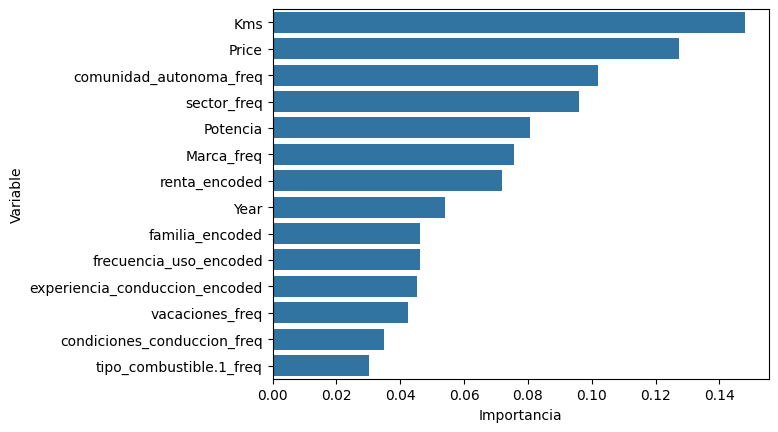

In [53]:
# Quedan así las importancias:
importances = rfc_model.feature_importances_

importance_rf_df = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importances})
importance_rf_df = importance_rf_df.sort_values('Importancia', ascending=False)
sns.barplot(data = importance_rf_df, x='Importancia', y ='Variable')

C:\Users\swatc\AppData\Local\Temp\ipykernel_1344\1362206583.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_rf_df, x='Importancia', y='Variable', palette='viridis')


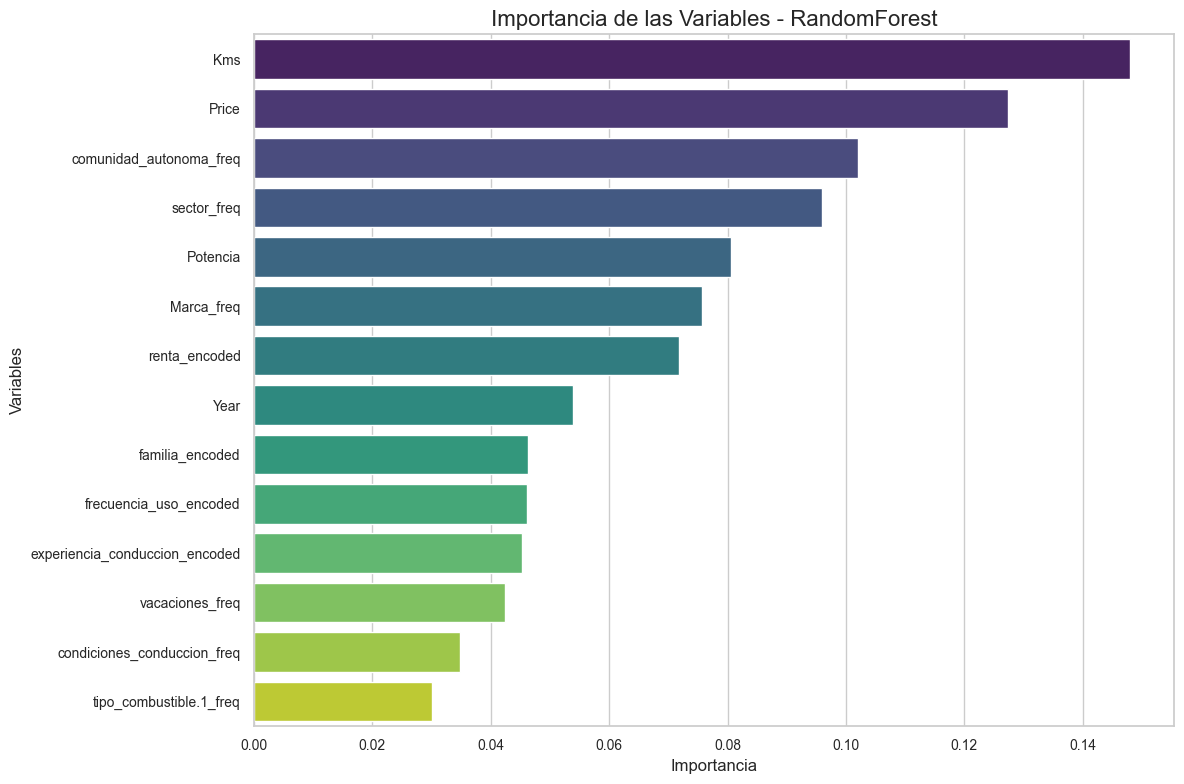

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo para la visualización
sns.set(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(12, 8))

# Crear el barplot con una paleta de colores agradable
sns.barplot(data=importance_rf_df, x='Importancia', y='Variable', palette='viridis')

# Ajustar etiquetas
plt.title('Importancia de las Variables - RandomForest', fontsize=16)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Mejorar la legibilidad de las etiquetas del eje y (rotarlas si es necesario)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Si tienes muchas variables, puedes rotar las etiquetas del eje y
plt.yticks(rotation=0)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


### GridSearch

In [54]:
rfc_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [74]:
# Definimos los hiperparámetros que queremos ajustar
parametros_probar = {
    'max_depth': [5, 10, 20],  # Ajustamos para evitar sobreajuste
    'min_samples_split': [2, 4, 5, 6],  # Probar valores más amplios
    'n_estimators': [20, 35, 50],  # Más valores para explora
    'max_features': ['auto', 'sqrt', 'log2']  # Diferentes estrategias
}

#Se hacen varias pruebas con los valores hasta que se consigue mejorar el error

In [75]:
# Realizamos la búsqueda exhaustiva de hiperparámetros utilizando GridSearch
grid_search = GridSearchCV(estimator=rfc_model, # el random forest
                           param_grid=parametros_probar, # parametros para hacer los ajustes
                           scoring='neg_mean_squared_error',
                           cv=3, # numero de folds
                           verbose=1)

In [76]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\swatc\Desktop\UNI\Proyecto grupal\Automatch\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\swatc\Desktop\UNI\Proyecto grupal\Automatch\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\swatc\Desktop\UNI\Proyecto grupal\Automatch\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [20, 35, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
# Obtenemos los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 20}


In [68]:
# Entrenamos el modelo con los mejores hiperparámetros encontrados
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=20)

In [69]:
# Hacemos predicciones con el modelo entrenado en el conjunto de prueba
y_pred = best_model.predict_proba(X_test)

In [70]:
# Convertimos las probabilidades en clases (0 o 1)
y_pred_class = (y_pred[:, 1] > 0.3).astype(int)

# Desempeño en entrenamiento
y_train_pred_proba = best_model.predict_proba(X_train)
    # Convertimos en clases para poder comparar con el target (0/1). Consideramos 1 si >0.3
y_train_pred_class = (y_train_pred_proba[:, 1] > 0.3).astype(int)  


rfc_train_mae = mean_absolute_error(y_train, y_train_pred_class)
rfc_train_mse = mean_squared_error(y_train, y_train_pred_class)
rfc_train_rmse = mean_squared_error(y_train, y_train_pred_class)**0.5

# Desempeño en prueba
rfc_test_mae = mean_absolute_error(y_test, y_pred_class)
rfc_test_mse = mean_squared_error(y_test, y_pred_class)
rfc_test_rmse = mean_squared_error(y_test, y_pred_class)**0.5

print(f'Errores en train: MAE=', rfc_train_mae, '/ MSE=',rfc_train_mse, '/ RMSE=', rfc_train_rmse)
print(f'Errores en test: MAE=', rfc_test_mae, '/ MSE=',rfc_test_mse, '/ RMSE=', rfc_test_rmse)

Errores en train: MAE= 0.09316013801501928 / MSE= 0.09316013801501928 / RMSE= 0.30522145733060657
Errores en test: MAE= 0.08858447488584476 / MSE= 0.08858447488584476 / RMSE= 0.29763144135968694


In [71]:
# Crear el DataFrame con las predicciones
df_resultados = pd.DataFrame(X_test)
df_resultados['probability'] = y_pred[:, 1]  # Extraemos la probabilidad de la clase 1
df_resultados['prediction_class'] = y_pred_class


# Guardar el resultado en un archivo CSV
df_resultados.to_csv(
    "C:/Users/swatc/Desktop/UNI/Proyecto grupal/Automatch/artifacts/data/modelo_output1.csv",
    index=False
)

In [72]:
# guardar en pkl
import joblib
joblib.dump(
    best_model,
    "C:/Users/swatc/Desktop/UNI/Proyecto grupal/Automatch/artifacts/data/modelo_users_cars1.pkl"
)

['C:/Users/swatc/Desktop/UNI/Proyecto grupal/Automatch/artifacts/data/modelo_users_cars1.pkl']

# Top 5 accuracy

In [73]:
from sklearn.metrics import accuracy_score


# Lista de las 5 más probables 
top_5_preds = np.argsort(y_pred, axis=1)[:, -5:]

# Verificar si la clase verdadera está entre las top 5 predicciones
top_5_correct = [y_true in top_5 for y_true, top_5 in zip(y_test, top_5_preds)]

# Calcular el Top-5 accuracy
top_5_accuracy = np.mean(top_5_correct)

print(f'Top-5 Accuracy: {top_5_accuracy:.4f}')


Top-5 Accuracy: 1.0000


Esto quiere decir que para todas las muestras en el conjunto de datos la clase verdadera (target 1) está dentro de las 5 clases más probables. 